In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import product
from matplotlib.text import Text

In [2]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [3]:
dictionary = {'Algorithm': ['RRT*', 'A*', 'APF'], 
              'Planning type':  ['Sum', 'Global', 'Local'], 
              'Day': ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10','Day11', 'Day12'], 
              'Survey': [1,2,3,4]} # survey3:argentario-corsica, survey4:elba-corsica

df = expand_grid(dictionary)

# t_travel=[None, None, 10.95, 9.01, 11.01, 8.98, 10.76, 8.83, None, None,
#           11.39, 9.22, None, None, None, None, None, None, 12.19,9.16,
#           10.71, 8.94, 10.26, 8.53,
#          9.93, 8.76, 9.13, 8.59, 10.10, 8.78, None, None, 9.99, None,
#           10.12, 8.69, None, 8.60, None, None, None, None, None, 9.20, 
#           10.17, 8.70, 9.64, 8.46,
#          9.49, 8.51, 9.07, 8.56, 10.08, 8.94, 10.25, 8.61, 9.99, 8.47,
#           10.48, 8.64, 10.94, 8.99, 9.77, 8.69, 9.20, 9.44, 9.52, 8.75,
#           9.93, 8.66, 9.82, 8.46,
#          None, None, 11.75, 9.78, 12.27, 9.79, 11.24, 9.28, None, None,
#           12.39, 9.91, None, None, None, None, None, None, 12.65, None,
#           11.11, 9.40, 10.22, 8.77,
#          10.10, 8.65, 9.98, 8.52, 10.99, 9.53, None, None, None, 8.52,
#           None, None, None, 9.08, 10.62, 9.15, None, None, None, 9.41,
#           10.62, 9.15, 10.23, 8.52,
#          10.10, 8.65, 9.98, 8.52, 10.99, 9.53, 10.47, 9.03, 10.35, 8.65,
#           10.99, 9.28, 11.76, 9.54, 10.62, 9.15, 9.98, 9.93, 10.51, 9.41,
#           10.75, 9.28, 9.97, 8.52,
#          None, None, 11.63, 9.56, 11.78, 9.35, 11.13, 9.36, None, None,
#           12.37, 9.41, None, None, None, None, None, None, 12.95, 10.19,
#           10.68, 8.86, 11.43, 8.48,
#          9.70, 8.39, 8.80, 8.11, 10.23, 8.74, None, 9.22, None, None,
#           None, None, 11.05, 9.07, 9.76, 8.63, 9.02, None, 9.77, None,
#           None, 8.63, None, 8.10,
#          10.15, 8.30, 9.00, 8.11, 10.10, 9.45, 10.62, 8.70, 10.61, 8.30,
#           11.04, 8.87, 12.22, 9.28, 9.83, 8.68, 9.24, 10.40, 9.94, 9.47,
#           9.84, 8.70, 10.28, 8.09
#          ]

# t_exec = [None, None, 5.125, 3.984, 7.037, 3.922, 9.617, 2.807, None, None,
#           9.110, 8.530, None, None, None, None, None, None, 8.564, 4.868,
#           2.579, 2.170, 7.264, 3.651,
#          35.361, 28.301, 60.924, 40.481, 51.197, 31.26, None, None, 65.404, None,
#           41.879, 24.212, None, 13.225, None, None, None, None, None, 34.369,
#           20.350, 66.402, 93.385, 17.802,
#          11.053, 10.719, 12.595, 9.615, 6.240, 4.550, 8.346, 6.085, 12.013, 8.093,
#           6.675, 5.805, 9.918, 13.051, 10.483, 6.476, 8.186, 11.167, 12.979, 8.913,
#           3.285, 2.424, 6.704, 6.045,
#          None, None, 3.597, 3.610, 3.690, 3.951, 3.305, 3.620, None, None,
#           1.138, 1.295, None, None, None, None, None, None, 2.716, None, 
#           1.192, 1.096, 2.288, 2.225, 
#          35.100, 31.229, 41.236, 36.585, 39.342, 36.032, None, None, None, 67.510,
#           None, None, None, 21.142, 19.060, 17.717, None, None, None, 16.854,
#           13.026, 12.040, 27.478, 24.296,
#          3.361, 3.198, 4.157, 4.360, 3.421, 3.647, 4.028, 4.333, 7.469, 6.111,
#           3.763, 3.747, 4.39, 4.38, 3.980, 4.021, 4.236, 3.901, 3.905, 4.030, 
#           3.164, 3.259, 3.195, 3.279,
#          None, None, 1.016, 0.756, 1.024, 0.638, 1.140, 0.953, None, None,
#           0.286, 0.236, None, None, None, None, None, None, 0.650, 0.540,
#           0.236, 0.195, 0.575, 0.540,
#          4.262, 3.912, 11.195, 5.103, 4.029, 4.611, None, 3.786, None, None,
#           None, None, 7.092, 5.077, 2.977, 2.244, 2.633, None, 4.856, None, 
#           None, 1.844, None, 1.308, 
#          0.722, 0.951, 0.767, 0.690, 0.661, 0.668, 1.259, 0.827, 1.381, 1.237,
#          0.809, 0.636, 0.565, 0.427, 0.937, 0.514, 0.705, 0.816, 0.724, 0.656,
#          0.470, 0.376, 0.683, 0.460]
#        [survey 1, survey 2, survey 3, survey 4, ...]
          
t_travel=[None, None, None, None, 10.95, 9.01, 10.95, 9.01, 11.01, 8.98, 11.01, 8.98, 10.76, 8.83, 10.76, 8.83, None, None, None, None,
          11.39, 9.22, 11.39, 9.22, None, None, None, None, None, None, None, None, None, None, None, None, 12.19, 9.16, 12.19, 9.16,
          10.71, 8.94, 10.71, 8.94, 10.26, 8.53, 10.26, 8.53, #sum RRT
         9.93, 8.76, 11.42, 10.20, 9.13, 8.59, None, None, 10.10, 8.78, 11.11, 9.44, None, None, None, None, 10.61, None, None, 8.52, 
          None, 8.69, None, 8.59, None, None, None, None, None, None, None, None, None, None, None, None, None, 9.20, None, 8.90,
          10.17, 8.70, 9.55, 8.48, 9.64, 8.46, 9.10, 8.77, #global RRT
         9.49, 8.51, 10.42, 9.86, 9.07, 8.56, 9.45, 8.65, 10.08, 8.94, 10.08, 8.45, 10.25, 8.61, 9.97, 8.63, 9.99, 8.47, 10.04, 8.46,
          10.48, 8.64, 11.02, 8.58, 10.94, 8.99, None, None, 9.77, 8.69, None, None, 9.20, 9.44, None, None, 9.52, 8.75, 11.28, 8.87,
          9.93, 8.66, 9.00, 8.25, 9.82, 8.46, 9.13, 8.47, #local RRT
         None, None, None, None, 11.75, 9.78, 11.75, 9.78, 12.27, 9.79, 12.27, 9.79, 11.24, 9.28, 11.24, 9.28, None, None, None, None,
          12.39, 9.91, 12.39, 9.91, None, None, None, None, None, None, None, None, None, None, None, None, 12.65, None, 12.65, None,
          11.11, 9.40, 11.11, 9.40, 10.22, 8.77, 10.22, 8.77, #sum a*
         10.10, 8.65, 11.37, 10.17, 9.98, 8.52, None, None, 10.99, 9.53, 10.75, 8.90, None, None, None, 9.03, None, None, None, 8.52,
          None, None, None, None, None, 9.08, None, None, 10.62, 9.15, None, None, None, None, None, None, None, 9.41, 11.62, 9.27,
          10.62, 9.15, 9.86, 8.39, 10.23, 8.52, 9.99, 8.52, #global a*
         10.10, 8.65, 11.12, 10.68, 9.98, 8.52, 9.98, 8.26, 10.99, 9.53, 10.74, 8.52, 10.47, 9.03, 10.48, 9.03, 10.35, 8.65, 9.97, 8.52,
          10.99, 9.28, 11.77, 8.77, 11.76, 9.54, None, None, 10.62, 9.15, None, None, 9.98, 9.93, None, None, 10.51, 9.41, 11.62, 9.27,
          10.75, 9.28, 9.72, 8.26, 9.97, 8.52, 9.99, 8.52, #local a*
         None, None, None, None, 11.63, 9.56, 11.63, 9.56, 11.78, 9.35, 11.78, 9.35, 11.13, 9.36, 11.13, 9.36, None, None, None, None,
          12.37, 9.41, 12.37, 9.41, None, None, None, None, None, None, None, None, None, None, None, None, 12.95, 10.19, 12.95, 10.19,
          10.68, 8.86, 10.68, 8.86, 11.43, 8.48, 11.43, 8.48, #sum apf
         9.70, 8.39, 10.64, 10.41, 8.80, 8.11, None, None, 10.23, 8.74, 10.42, 8.88, None, None, None, None, None, None, None, 8.34,
          None, None, 11.35, 8.89, None, 9.07, None, None, 9.76, 8.63, None, None, 9.02, None, None, None, 9.77, None, 11.87, 8.84,
          None, 8.63, 9.14, 8.28, None, 8.10, 9.06, 8.45,   #global apf
         10.15, 8.30, 10.76, 10.74, 9.00, 8.11, 9.55, 8.13, 10.10, 9.45, 10.71, 8.11, 10.62, 8.70, 11.91, 8.33, 10.61, 8.30, 10.51, 8.11,
          11.04, 8.87, 11.44, 8.35, 12.22, 9.28, None, None, 9.83, 8.68, None, None, 9.24, 10.40, None, None, 9.94, 9.47, 12.43, 9.02,
          9.84, 8.70, 8.74, 7.82, 10.28, 8.09, 8.77, 8.11    #local apf
         ]
t_exec = [None, None, None, None, 5.125, 3.984, 5.125, 3.984, 7.037, 3.922, 7.037, 3.922, 9.617, 2.807, 9.617, 2.807, None, None, None, None,
          9.110, 8.530, 9.110, 8.530, None, None, None, None, None, None, None, None, None, None, None, None, 8.564, 4.868, 8.564, 4.868,
          2.579, 2.170, 2.579, 2.170, 7.264, 3.651, 7.264, 3.651,
         35.361, 28.301, 34.813, 29.758, 60.924, 40.481, None, None, 51.197, 31.26, 47.106, 39.223, None, None, None, None, 59.267, None, None, 26.785,
          None, 24.212, None, 24.101, None, None, None, None, None, None, None, None, None, None, None, None, None, 34.369, None, 21.298,
          20.350, 66.402, 41.975, 40.509, 93.385, 17.802, 20.928, 25.891,
         11.053, 10.719, 4.789, 4.317, 12.595, 9.615, 11.377, 10.152, 6.240, 4.550, 4.623, 5.447, 8.346, 6.085, 7.240, 11.968, 12.013, 8.093, 6.663, 6.120,
          6.675, 5.805, 10.737, 5.483, 9.918, 13.051, None, None, 10.483, 6.476, None, None, 8.186, 11.167, None, None, 12.979, 8.913, 6.896, 7.978,
          3.285, 2.424, 2.742, 3.471, 6.704, 6.045, 3.709, 4.047,
         None, None, None, None, 3.597, 3.610, 3.597, 3.610, 3.690, 3.951, 3.690, 3.951, 3.305, 3.620, 3.305, 3.620, None, None, None, None,
          1.138, 1.295, 1.138, 1.295, None, None, None, None, None, None, None, None, None, None, None, None, 2.716, None, 2.716, None,
          1.192, 1.096, 1.192, 1.096, 2.288, 2.225, 2.288, 2.225,
         35.100, 31.229, 14.723, 26.180, 41.236, 36.585, None, None, 39.342, 36.032, 26.689, 24.071, None, None, None, 27.553, None, None, None, 29.289,
          None, None, None, None, None, 21.142, None, None, 19.060, 17.717, None, None, None, None, None, None, None, 16.854, 21.960, 18.645,
          13.026, 12.040, 28.043, 21.341, 27.478, 24.296, 22.157, 20.229,
         3.361, 3.198, 2.450, 2.852, 4.157, 4.360, 2.915, 2.909, 3.421, 3.647, 2.810, 3.230, 4.028, 4.333, 3.350, 3.384, 7.469, 6.111, 3.219, 3.518,
          3.763, 3.747, 1.711, 1.288, 4.39, 4.38, None, None, 3.980, 4.021, None, None, 4.236, 3.901, None, None, 3.905, 4.030, 2.300, 1.878,
          3.164, 3.259, 2.122, 2.378, 3.195, 3.279, 2.210, 2.437,
         None, None, None, None, 1.016, 0.756, 1.016, 0.756, 1.024, 0.638, 1.024, 0.638, 1.140, 0.953, 1.140, 0.953, None, None, None, None,
          0.286, 0.236, 0.286, 0.236, None, None, None, None, None, None, None, None, None, None, None, None, 0.650, 0.540, 0.650, 0.540,
          0.236, 0.195, 0.236, 0.195, 0.575, 0.540, 0.575, 0.540,
         4.262, 3.912, 1.144, 0.714, 11.195, 5.103, None, None, 4.029, 4.611, 0.879, 0.460, None, None, None, None, None, None, None, 0.660,
          None, None, 1.626, 0.528, None, 5.077, None, None, 2.977, 2.244, None, None, 2.633, None, None, None, 4.856, None, 0.672, 0.496,
          None, 1.844, 0.595, 0.468, None, 1.308, 0.306, 0.279, 
         0.722, 0.951, 0.064, 0.048, 0.767, 0.690, 0.063, 0.051, 0.661, 0.668, 0.044, 0.051, 1.259, 0.827, 0.105, 0.056, 1.381, 1.237, 0.068, 0.055,
         0.809, 0.636, 0.052, 0.049, 0.565, 0.427, None, None, 0.937, 0.514, None, None, 0.705, 0.816, None, None, 0.724, 0.656, 0.086, 0.057,
         0.470, 0.376, 0.025, 0.020, 0.683, 0.460, 0.032, 0.040]
# success_ratio = np.zeros_like(t_travel)
planning_ratio = np.zeros_like(t_travel)
traveltimevero = np.zeros_like(t_travel)
# for i in range(len(t_travel)): # 1 found path, 0 failed
#     if t_travel[i]:
#         success_ratio[i] = 100
#         planning_ratio[i] = 100
#     else:
#         if df['Planning type'][i] == 'Global':
#             success_ratio[i] = 0
#             planning_ratio[i] = 100
            
#         if df['Planning type'][i] == 'Summing':
#             success_ratio[i] = 100
#             planning_ratio[i] = 0           


# safety_ratio = np.zeros_like(t_travel)
# efficiency_ratio = np.zeros_like(t_travel)
# for i in range(len(t_travel)): # 1 found path, 0 failed
#     if df['Planning type'][i] == 'Sum':
#         safety_ratio[i] = 100
#         if t_travel[i]:
#             efficiency_ratio[i] = 100
#         else:
#             efficiency_ratio[i] = 0
#     if df['Planning type'][i] == 'Global':
#         if t_travel[i]:
#             safety_ratio[i] = 100
#             efficiency_ratio[i] = 100
#         else:
#             safety_ratio[i] = 0
#             efficiency_ratio[i] = 0
#     if df['Planning type'][i] == 'Local':
#         efficiency_ratio[i] = 100
            
for i in range(len(t_travel)): # 1 found path, 0 failed
    if t_travel[i]:
        if df['Planning type'][i] == 'Sum' or df['Planning type'][i] == 'Global' or df['Planning type'][i] == 'Local':
            planning_ratio[i] = 100
        else:
            planning_ratio[i] = 0

for i in range(len(t_travel)):
    if t_travel[i]:
        traveltimevero[i] = t_travel[i]
    else:
        traveltimevero[i] = None
        
#pd.set_option("display.max_rows", None, "display.max_columns", None)

# df['Safety (%)'] = safety_ratio
# df['Efficiency (%)'] = efficiency_ratio
df['Efficiency (%)'] = planning_ratio
df['Travel time (h)'] = t_travel
df['Computing time (s)'] = t_exec 
df

,Algorithm,Planning type,Day,Survey,Efficiency (%),Travel time (h),Computing time (s)
0,RRT*,Sum,Day1,1,0,NaN,NaN
1,RRT*,Sum,Day1,2,0,NaN,NaN
2,RRT*,Sum,Day1,3,0,NaN,NaN
3,RRT*,Sum,Day1,4,0,NaN,NaN
4,RRT*,Sum,Day2,1,100,10.95,5.125
...,...,...,...,...,...,...,...
427,APF,Local,Day11,4,100,7.82,0.020
428,APF,Local,Day12,1,100,10.28,0.683
429,APF,Local,Day12,2,100,8.09,0.460
430,APF,Local,Day12,3,100,8.77,0.032


In [197]:
# devo considerare solo le simulazioni in cui tutti i metodi non sono None
# ovvero Day 3 all survey, 11 survey2, 12 survey2,
df_rrt = df.loc[df['Planning type']== 'Local']
lista = []

for i, val in df_rrt.iterrows():
    temp_dict = {}
    if (np.isnan(val["Travel time (h)"])) == True:
        temp_dict["Day"] = val["Day"]
        temp_dict["Sur"] = val["Survey"]
        lista.append(temp_dict)

In [198]:
todrop = []
for temp in lista: 
    day  = temp["Day"]
    surv = temp["Sur"]
    for index, value in df_rrt.iterrows():
        if value["Day"]==day and value["Survey"] == surv:
            todrop.append(index)
            
df_rrt_mod = df_rrt
df_rrt_mod = df_rrt_mod.drop(todrop)

In [201]:
# df_rrt_mod_sum = df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Sum']
# df_rrt_mod_glo = df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Global']
# df_rrt_mod_loc = df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Local']
df_rrt_mod_sum = df_rrt_mod.loc[df_rrt_mod['Algorithm'] == 'A*']
df_rrt_mod_glo = df_rrt_mod.loc[df_rrt_mod['Algorithm'] == 'APF']
df_rrt_mod_loc = df_rrt_mod.loc[df_rrt_mod['Algorithm'] == 'RRT*']

adding_value = 0 #serve per settare quanto grande vediamo lo scarto -> lo rendiamo proporzioanle al massimo delle ore del travel times.

# data_sum_rrt = pd.DataFrame(data={'Algorithm': [""],'Mean travel time (h)': [np.mean(df_rrt_mod_sum["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
# data_glo_rrt = pd.DataFrame(data={'Algorithm': [""],'Mean travel time (h)': [np.mean(df_rrt_mod_glo["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
# data_loc_rrt = pd.DataFrame(data={'Algorithm': [""],'Mean travel time (h)': [np.mean(df_rrt_mod_loc["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})

data_sum_rrt = pd.DataFrame(data={'Planning type': [""],'Mean travel time (h)': [np.mean(df_rrt_mod_sum["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_glo_rrt = pd.DataFrame(data={'Planning type': [""],'Mean travel time (h)': [np.mean(df_rrt_mod_glo["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_loc_rrt = pd.DataFrame(data={'Planning type': [""],'Mean travel time (h)': [np.mean(df_rrt_mod_loc["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})

min_mean = min([data_sum_rrt["Mean travel time (h)"][0],data_glo_rrt["Mean travel time (h)"][0],data_loc_rrt["Mean travel time (h)"][0]])
max_mean = max([data_sum_rrt["Mean travel time (h)"][0],data_glo_rrt["Mean travel time (h)"][0],data_loc_rrt["Mean travel time (h)"][0]])

data_sum_rrt["Variation w.r.t. fastest path (%)"]= (((data_sum_rrt["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_glo_rrt["Variation w.r.t. fastest path (%)"]= (((data_glo_rrt["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_loc_rrt["Variation w.r.t. fastest path (%)"]= (((data_loc_rrt["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value

print(data_sum_rrt)
print(data_glo_rrt)
print(data_loc_rrt)

  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                                9.79                           4.927655
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.541905                           2.268609
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.330238                                0.0


0.0
2.2686094878403287
4.927654579324776


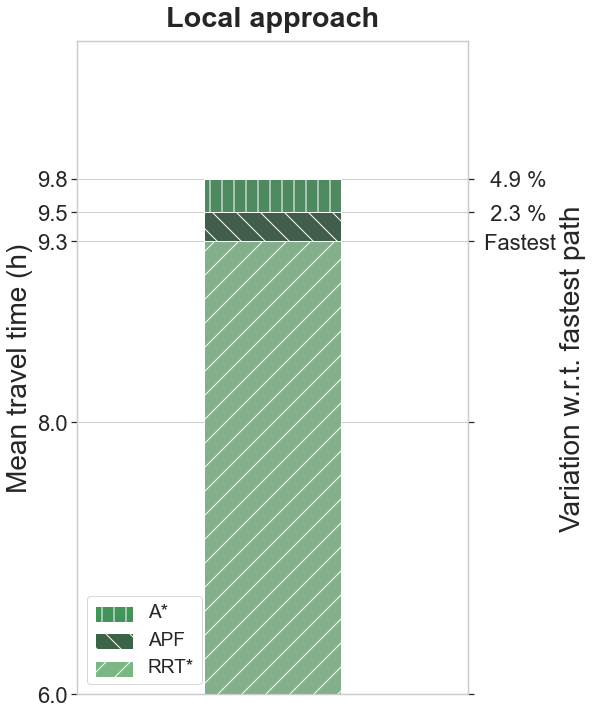

In [205]:
sns.set_context(rc = {'patch.linewidth': 0.8})
sns.set_theme(style="whitegrid",font_scale=1.5)
#green = 7cb685, 44935b, 3b6347, blue = 7da9c7, 4884af, 3d5b70 orange = dd905b, cd6529, 7f4c2e 
#style palette = 5975a4 (blue), cc8963 (orange), 5f9e6e (green)
color_sum = "#44935b"
color_glo = "#3b6347"
color_loc = "#7cb685"

f, ax = plt.subplots(figsize=(7,12))
ax = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_sum_rrt, ci=None,  color=color_sum, label='A*')
ax = sns.barplot(x="Planning type",  y="Mean travel time (h)", data=data_glo_rrt, ci=None, color=color_glo, label='APF')
ax = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_loc_rrt, ci=None,  color=color_loc,  label='RRT*')



bars = ax.patches
pattern= ['|','\\', '/'] #['-', '+', 'x']
hatches=np.repeat(pattern,1)
for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


ax2 = ax.twinx() 
ax2 = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_sum_rrt, ci=None,  color=color_sum, label='A*')
ax2 = sns.barplot(x="Planning type",  y="Mean travel time (h)", data=data_glo_rrt, ci=None, color=color_glo, label='APF')
ax2 = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_loc_rrt, ci=None,  color=color_loc,  label='RRT*')


bars = ax2.patches
# pattern=['|','\\','/']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


# add legend
legend_astar = mpatches.Patch(edgecolor ="white", facecolor =color_sum, label='A*', hatch = "|")
legend_apf = mpatches.Patch(edgecolor ="white", facecolor =color_glo, label='APF', hatch="\\")
legend_rrt= mpatches.Patch(edgecolor ="white", facecolor =color_loc, label='RRT*', hatch="/")

leg = plt.legend(handles=[legend_astar, legend_apf, legend_rrt], loc="lower left", fontsize=19) #19

#for patch in leg.get_patches():
#    patch.set_height(24)
#    patch.set_y(-4)

for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-4)
    
change_width_vertical(ax, 0.35)  
change_width_vertical(ax2, 0.35)  


#Travel time axes 
axtik = ax.get_yticks().tolist()
#axtik.remove(axtik[-1])
# axtik.remove(10.0)

for dataframe_t in [data_sum_rrt,data_glo_rrt,data_loc_rrt]:
    axtik.append(round(dataframe_t["Mean travel time (h)"][0],3))
    axtik.sort()

axtik.remove(10.0)
axlabels = []
temp = 0
for i in axtik:
#     print(temp)
    if temp == 5:
        to_ins = Text(i,0,"" + str(round(i,1)))
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
    temp += 1

# axlabels.pop(6)   

ax.set_yticks(axtik)
ax.set_ylabel("Mean travel time (h)", fontsize=28)
ax.set_yticklabels(axlabels,rotation=0, fontsize=22)


ax2tik = ax2.get_yticks().tolist()
#ax2tik.remove(ax2tik[-1])

for dataframe_t in [data_sum_rrt,data_glo_rrt,data_loc_rrt]:
    ax2tik.append(round(dataframe_t["Mean travel time (h)"][0],3))
    ax2tik.sort()

tocheckvalue = [round(dataframe_t["Mean travel time (h)"][0],3) for dataframe_t in [data_sum_rrt,data_glo_rrt,data_loc_rrt]]
ax2labels = []


for i in axtik:
    if i in tocheckvalue:
        for a in [data_sum_rrt,data_glo_rrt,data_loc_rrt]:
            if round(a["Mean travel time (h)"][0],3) != i:
                continue
            else:
                number = a["Variation w.r.t. fastest path (%)"][0]
                print(number)
                if number == 0:
                    count  = 0
                    to_ins = Text(i,0, "" + " "*count + " Fastest" )
                    ax2labels.append(to_ins)
#                 elif number == 4.748432482030879:
#                     count=2
#                     to_ins = Text(i,0,"\n" + " "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
#                     ax2labels.append(to_ins)
                else:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
                    ax2labels.append(to_ins)

    else:
        to_ins = Text(i,0,"")
        ax2labels.append(to_ins)

ax2tik.remove(10.0)
ax2.set_ylabel("Variation w.r.t. fastest path", fontsize=28)
ax.set_xlabel(None)
ax2.set_yticks(ax2tik)
ax2.set_yticklabels(ax2labels,rotation=0, fontsize=22)

ax.set_ylim(6, 10.8)
ax2.set_ylim(6, 10.8)
# ax.yaxis.grid(True, which='minor')
# ax2.yaxis.grid(True, which='minor')

plt.title("Local approach", pad = 15, fontdict={'fontsize': plt.rcParams['axes.titlesize']*1.6,
 'fontweight' : "bold"} )

# plt.savefig("barlocnew2.png", dpi=300, bbox_inches='tight')

plt.show()

In [162]:
axtik

[0.0, 2.0, 4.0, 6.0, 8.0, 10.06, 10.538, 10.658, 12.0]

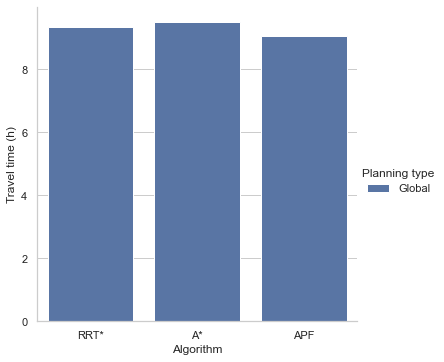

In [179]:
len(df_rrt_mod)

sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Travel time (h)", hue="Planning type", kind="bar", data=df_rrt_mod, ci=None)
# plt.savefig("tcomp_new.png", dpi=300,bbox_inches='tight')
plt.show()

In [79]:
np.mean(df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Sum']['Travel time (h)'])
np.mean(df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Local']['Travel time (h)'])



9.228823529411764

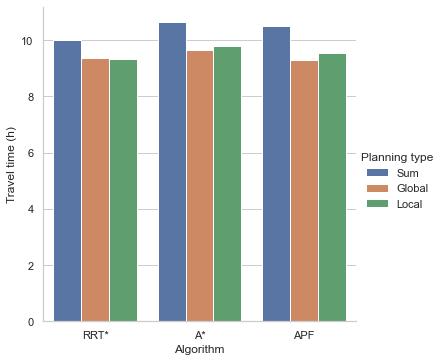

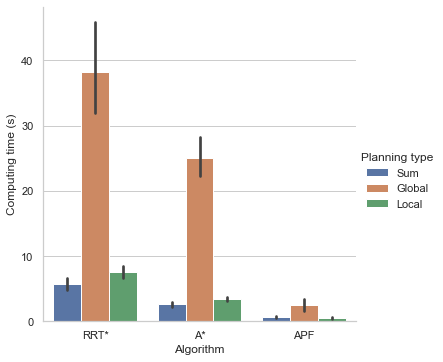

In [278]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Travel time (h)", hue="Planning type", kind="bar", data=df, ci=None)
# plt.savefig("tcomp_new.png", dpi=300,bbox_inches='tight')
plt.show()
sns.catplot(x="Algorithm", y="Computing time (s)", hue="Planning type", kind="bar", data=df)
# plt.savefig("texec_new.png", dpi=300,bbox_inches='tight')
plt.show()


In [279]:
efficiency1 = [np.mean(df.loc[df['Planning type'] == 'Sum']['Efficiency (%)']), np.mean(df.loc[df['Planning type'] == 'Global']['Efficiency (%)']),
              np.mean(df.loc[df['Planning type'] == 'Local']['Efficiency (%)'])]
safetyimpr = [
         100, 100, 100, 100, 100, 100, 0, 0, 100, 100, 100, 100, 100,   0, 0, 100, 100, 100, 0, 100,
         100, 100, 0, 0, 100, 100,  100, 100, 0, 100, 100, 100,  0,   0, 100, 100, 100, 100, 0, 100,
         100, 100, 100, 100, 100, 100, 0, 100, # local rrt
         
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  0,0, 0, 100, 100, 100, 0, 0,
         100, 100, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100,   0, 100, 100, 100,   0,  100, 100,
         100, 100, 100, 100, 100, 100, 0, 100, # local a*
         
         100, 100, 100, 100, 100, 100, 0, 0, 100, 100, 100, 100,  0,    0, 0, 100,  0, 100, 0, 100,
           0,   0,  0, 0, 100, 100, 100, 100, 100, 100,  100, 100, 0,   0, 100, 100, 100,   0, 0, 100,
           0, 100, 100, 100,  0, 100, 0, 100]  # local apf
np.mean(safetyimpr)

safetytot1  = [100, 100, np.mean(safetyimpr)]

dfeffsaf1 = pd.DataFrame(data={'Approach': ["Sum", "Global", "Local"], 'Efficiency (%)':efficiency1, 'Safety (%)':safetytot1})
dfeffsaf1

,Approach,Efficiency (%),Safety (%)
0,Sum,56.944444,100.000000
1,Global,52.777778,100.000000
2,Local,87.500000,72.222222


[0.0, 20.0, 40.0, 60.0, 72.22222222222223, 80.0, 100.0, 120.0]


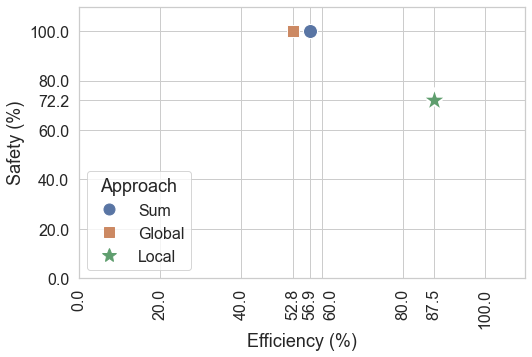

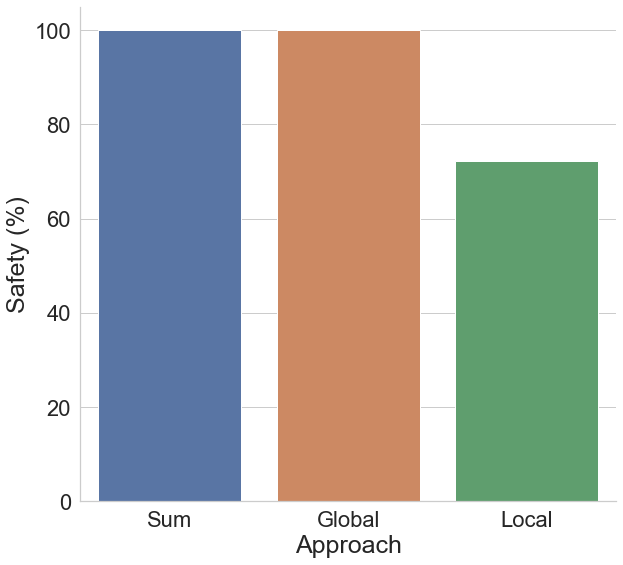

In [286]:
import matplotlib.lines as mlines
import matplotlib as mpl
import types
sns.set(style="whitegrid", rc={'figure.figsize':(8,5)}, font_scale=1.5)

ax = sns.scatterplot(data=dfeffsaf1.loc[dfeffsaf1['Approach'] == 'Sum'], x="Efficiency (%)", y="Safety (%)", hue="Approach",s=200, marker='o', palette=['#5975a4'], label='Sum')
ax = sns.scatterplot(data=dfeffsaf1.loc[dfeffsaf1['Approach'] == 'Global'], x="Efficiency (%)", y="Safety (%)", hue="Approach", s=150, marker='s', palette=['#cc8963'], label='Global')
ax = sns.scatterplot(data=dfeffsaf1.loc[dfeffsaf1['Approach'] == 'Local'], x="Efficiency (%)", y="Safety (%)", hue="Approach",s=600, marker='*', palette=['#5f9e6e'], label='Local')
# sns.lineplot(data=dfeff_saf,  x="Efficiency (%)", y="Safety (%)", hue="Approach", marker='.')
# plt.text(efficiency[0]-2, safetytot[0]-4, 'Sum',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# plt.text(efficiency[1]+3, safetytot[1]-4, 'Global',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# plt.text(efficiency[2], safetytot[2]-4, 'Local',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# plt.text(efficiency[3]-5, safetytot[3]-4, 'Improved method',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# ax.legend_.remove()


sum1 = mlines.Line2D([], [], color='#5975a4', marker='o', linestyle='None',
                          markersize=11, label='Sum')
global1 = mlines.Line2D([], [], color='#cc8963', marker='s', linestyle='None',
                          markersize=10, label='Global')
loc1 = mlines.Line2D([], [], color='#5f9e6e', marker='*', linestyle='None',
                          markersize=15, label='Local')

plt.legend(handles=[sum1, global1, loc1],title='Approach', prop={"size":16}, loc="lower left")
# ax.legend(prop={"size":18}, loc="lower left")
# ax.add_legend()
ax.set_ylim(0, 110)
ax.set_xlim(0, 110)
axtik = ax.get_xticks().tolist()
axtik.append(dfeffsaf1['Efficiency (%)'][0])
axtik.append(dfeffsaf1['Efficiency (%)'][1])
axtik.append(dfeffsaf1['Efficiency (%)'][2])
axtik.sort()
# axtik.remove(60.0)
axlabels = []
temp = 0
for i in axtik:
#     print(temp)
    if temp == 3:
        to_ins = Text(i,0,str(round(i,1)))
    elif temp == 5:
        to_ins = Text(i,0,"\n"+str(round(i,1)))
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
    temp += 1
ax.set_xticks(axtik)
ax.set_xticklabels(axlabels,rotation='vertical', fontsize=16)

axtik2 = ax.get_yticks().tolist()
axtik2.append(dfeffsaf1['Safety (%)'][2])
axtik2.sort()
# axtik2.remove(axtik2[5])
print(axtik2)
# ax.set_yticks(axtik2)
# plt.yticks(fontsize=16)
axlabels2 = []
temp = 0
for i in axtik2:
#     print(temp)
    if temp == 5:
        to_ins = Text(i,0,str(round(i,1)))
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels2.append(to_ins)
    temp += 1
ax.set_yticks(axtik2)
ax.set_yticklabels(axlabels2, fontsize=16)

ax.set_ylim(0, 110)
ax.set_xlim(0, 110)
# axtik.remove(60.0)
plt.savefig("safety_eff", dpi=300, bbox_inches='tight')
plt.show()


sns.set(style="whitegrid", font_scale=2)
ax = sns.catplot(x="Approach", y="Safety (%)", kind="bar", data=dfeffsaf1, ci=None, height=8, aspect=1.1)#, palette=sns.color_palette(['#5975a4', '#cc8963', "#5f9e6e", 'gold']))
# ax.axes[0][0].set_xlabel("Algorithm", fontsize=18)
ax.axes[0][0].set_ylabel("Safety (%)", fontsize=25)
# plt.title("RRT*", pad = 1, fontweight= "bold")
ax.axes[0][0].set_xlabel("Approach", fontsize=25)
# plt.savefig("safetybar1.png", dpi=300, bbox_inches='tight')
plt.show()

In [284]:
axtik

[0.0,
 20.0,
 40.0,
 52.77777777777778,
 56.94444444444444,
 60.0,
 80.0,
 87.5,
 100.0,
 120.0]

In [287]:
summing_df = df.loc[df['Planning type'] == "Sum"]
global_df = df.loc[df['Planning type'] == "Global"]
local_df = df.loc[df['Planning type'] == "Local"]

astar_df = df.loc[df['Algorithm'] == "A*"]
apf_df = df.loc[df['Algorithm'] == "APF"]
rrt_df = df.loc[df['Algorithm'] == "RRT*"]

# sns.set_theme(style="whitegrid")
# sns.set_context(rc = {'patch.linewidth': 0.0})
# sns.catplot(x="Algorithm", y="Travel time (h)", kind="bar", data=summing_df, ci=None, palette="Blues_d") # flare = d47d6f, b1516e, 7b3b6b, orange = dd905b, cd6529, 7f4c2e
# # plt.savefig("bleah.png", dpi=300, bbox_inches='tight')                                                    # green = 7cb685, 44935b, 3b6347, blue = 7da9c7, 4884af, 3d5b70
# plt.show()                                                                                               # style palette = 5975a4 (blue), cc8963 (orange), 5f9e6e (green)
        
summing_df

,Algorithm,Planning type,Day,Survey,Efficiency (%),Travel time (h),Computing time (s)
0,RRT*,Sum,Day1,1,0,NaN,NaN
1,RRT*,Sum,Day1,2,0,NaN,NaN
2,RRT*,Sum,Day1,3,0,NaN,NaN
3,RRT*,Sum,Day1,4,0,NaN,NaN
4,RRT*,Sum,Day2,1,100,10.95,5.125
...,...,...,...,...,...,...,...
331,APF,Sum,Day11,4,100,8.86,0.195
332,APF,Sum,Day12,1,100,11.43,0.575
333,APF,Sum,Day12,2,100,8.48,0.540
334,APF,Sum,Day12,3,100,11.43,0.575


In [95]:
def change_width_horizontal(ax, new_value) :
    
    for patch in ax.patches :
        
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)

def change_width_vertical(ax, new_value) :
    
    for patch in ax.patches :
        
        current_height = patch.get_width()
        diff = current_height - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

def round_to_multiple(number, multiple):
    return multiple * round(number / multiple)

In [289]:
df.loc[df['Planning type'] == "Sum"]

,Algorithm,Planning type,Day,Survey,Efficiency (%),Travel time (h),Computing time (s)
0,RRT*,Sum,Day1,1,0,NaN,NaN
1,RRT*,Sum,Day1,2,0,NaN,NaN
2,RRT*,Sum,Day1,3,0,NaN,NaN
3,RRT*,Sum,Day1,4,0,NaN,NaN
4,RRT*,Sum,Day2,1,100,10.95,5.125
...,...,...,...,...,...,...,...
331,APF,Sum,Day11,4,100,8.86,0.195
332,APF,Sum,Day12,1,100,11.43,0.575
333,APF,Sum,Day12,2,100,8.48,0.540
334,APF,Sum,Day12,3,100,11.43,0.575


In [270]:
adding_value = 0 #serve per settare quanto grande vediamo lo scarto -> lo rendiamo proporzioanle al massimo delle ore del travel times.

data_sum_astar = pd.DataFrame(data={'Algorithm': [""],'Mean travel time (h)': [np.nanmean(local_df.loc[df.loc[df['Planning type'] == "Local"]['Algorithm'] == "A*"]["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_sum_rrt = pd.DataFrame(data={'Algorithm': [""],'Mean travel time (h)': [np.nanmean(local_df.loc[df.loc[df['Planning type'] == "Local"]['Algorithm'] == "RRT*"]["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_sum_apf = pd.DataFrame(data={'Algorithm': [""],'Mean travel time (h)': [np.nanmean(local_df.loc[df.loc[df['Planning type'] == "Local"]['Algorithm'] == "APF"]["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})

min_mean = min([data_sum_astar["Mean travel time (h)"][0],data_sum_rrt["Mean travel time (h)"][0],data_sum_apf["Mean travel time (h)"][0]])
max_mean = max([data_sum_astar["Mean travel time (h)"][0],data_sum_rrt["Mean travel time (h)"][0],data_sum_apf["Mean travel time (h)"][0]])

data_sum_astar["Variation w.r.t. fastest path (%)"]= (((data_sum_astar["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_sum_rrt["Variation w.r.t. fastest path (%)"]= (((data_sum_rrt["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_sum_apf["Variation w.r.t. fastest path (%)"]= (((data_sum_apf["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value

print(data_sum_apf)
print(data_sum_rrt)
print(data_sum_astar)

  Algorithm  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                        9.541905                           2.268609
  Algorithm  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                        9.330238                                0.0
  Algorithm  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.79                           4.927655


In [49]:
# np.nanmean(df.loc[df['Planning type'] == "Summing"]["Travel time (h)"])

data_summing = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(apf_df.loc[apf_df['Planning type'] == 'Sum']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_global = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(apf_df.loc[apf_df['Planning type'] == 'Global']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_local = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(apf_df.loc[apf_df['Planning type'] == 'Local']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})

min_mean = min([data_summing["Mean travel time (h)"][0],data_global["Mean travel time (h)"][0],data_local["Mean travel time (h)"][0]])
max_mean = max([data_summing["Mean travel time (h)"][0],data_global["Mean travel time (h)"][0],data_local["Mean travel time (h)"][0]])

data_summing["Variation w.r.t. fastest path (%)"]= (((data_summing["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_global["Variation w.r.t. fastest path (%)"]= (((data_global["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_local["Variation w.r.t. fastest path (%)"]= (((data_local["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value

print(data_summing)
print(data_global)
print(data_local)

  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                           10.512857                          13.172526
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.289231                                0.0
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.541905                           2.720074


In [404]:
# print(data_sum_apf)
# print(data_sum_rtt)
# print(data_sum_astar)

In [465]:
# sns.set_context(rc = {'patch.linewidth': 0.8})
# sns.set_theme(style="whitegrid",font_scale=2)

# color_astar = "#dd905b"
# color_apf = "#cd6529"
# color_rrt = "#7f4c2e"

# f, ax = plt.subplots(figsize=(18,8))
# ax = sns.barplot(y="Algorithm",  x="Mean travel time (h)", data=data_sum_astar, ci=None, color=color_astar, label='A*')
# ax = sns.barplot(y="Algorithm", x="Mean travel time (h)", data=data_sum_rtt, ci=None,  color=color_rrt,  label='RRT*')
# ax = sns.barplot(y="Algorithm", x="Mean travel time (h)", data=data_sum_apf, ci=None,  color=color_apf, label='APF')



# bars = ax.patches
# pattern=['-','\\','/']
# hatches=np.repeat(pattern,1)

# for pat,bar in zip(hatches,bars):
#     bar.set_hatch(pat)


# ax2 = ax.twiny() 
# ax2 = sns.barplot(y="Algorithm",  x="Mean travel time (h)", data=data_sum_astar, ci=None, color=color_astar, label='A*')
# ax2 = sns.barplot(y="Algorithm", x="Mean travel time (h)", data=data_sum_rtt, ci=None,  color=color_rrt,  label='RRT*')
# ax2 = sns.barplot(y="Algorithm", x="Mean travel time (h)", data=data_sum_apf, ci=None,  color=color_apf, label='APF')
     
# bars = ax2.patches
# pattern=['-','\\','/']
# hatches=np.repeat(pattern,1)

# for pat,bar in zip(hatches,bars):
#     bar.set_hatch(pat)


# # add legend
# legend_astar = mpatches.Patch(edgecolor ="white", facecolor =color_astar, label='A*', hatch = "-")
# legend_apf = mpatches.Patch(edgecolor ="white", facecolor =color_apf, label='APF', hatch="\\")
# legend_rrt= mpatches.Patch(edgecolor ="white", facecolor =color_rrt, label='RRT*', hatch="/")

# leg = plt.legend(handles=[legend_astar, legend_apf, legend_rrt], loc="upper left")

# for patch in leg.get_patches():
#     patch.set_height(24)
#     patch.set_y(-7)


# change_width_horizontal(ax, 0.35)  
# change_width_horizontal(ax2, 0.35)  


# #Travel time axes 
# axtik = ax.get_xticks().tolist()
# #axtik.remove(axtik[-1])
# axtik.remove(10.0)

# for dataframe_t in [data_sum_apf,data_sum_rtt,data_sum_astar]:
#     axtik.append(round(dataframe_t["Mean travel time (h)"][0],3))
#     axtik.sort()

# axlabels = []
# for i in axtik:
#     to_ins = Text(i,0,str(round(i,1)))
#     axlabels.append(to_ins)

# ax.set_xticks(axtik)
# # axlabels.pop(6)
# ax.set_xticklabels(axlabels,rotation=90)


# ax2tik = ax2.get_xticks().tolist()
# #ax2tik.remove(ax2tik[-1])
# ax2tik.remove(10.0)

# for dataframe_t in [data_sum_apf,data_sum_rtt,data_sum_astar]:
#     ax2tik.append(round(dataframe_t["Mean travel time (h)"][0],3))
#     ax2tik.sort()

# tocheckvalue = [round(dataframe_t["Mean travel time (h)"][0],3) for dataframe_t in [data_sum_apf,data_sum_rtt,data_sum_astar]]
# ax2labels = []


# for i in axtik:
#     if i in tocheckvalue:
#         for a in [data_sum_apf,data_sum_rtt,data_sum_astar]:
#             if round(a["Mean travel time (h)"][0],3) != i:
#                 continue
#             else:
#                 number = a["Variation w.r.t. fastest path (%)"][0]
#                 if number == 0:
#                     count  = 0
#                     to_ins = Text(i,0, " "*count + "Fastest" )
#                     ax2labels.append(to_ins)
#                 else:
#                     count  = 2
#                     to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
#                     ax2labels.append(to_ins)

#     else:
#         to_ins = Text(i,0,"")
#         ax2labels.append(to_ins)


# ax2.set_xlabel("Variation w.r.t. fastest path")
# ax2.set_xticks(ax2tik)
# # ax2labels.pop(6)
# ax2.set_xticklabels(ax2labels,rotation=90)

# ax.set_xlim(6, 11)
# ax2.set_xlim(6, 11)
# ax.xaxis.grid(True, which='minor')
# ax2.xaxis.grid(True, which='minor')

# #plt.title("Summing approach", pad = 45, fontdict={'fontsize': plt.rcParams['axes.titlesize']*1.4,
# # 'fontweight' : "bold"} )

# # plt.savefig("nuovografuco.png", dpi=500, bbox_inches='tight')

# plt.show()

4.9276545793247575
0.0
2.2686094878403478


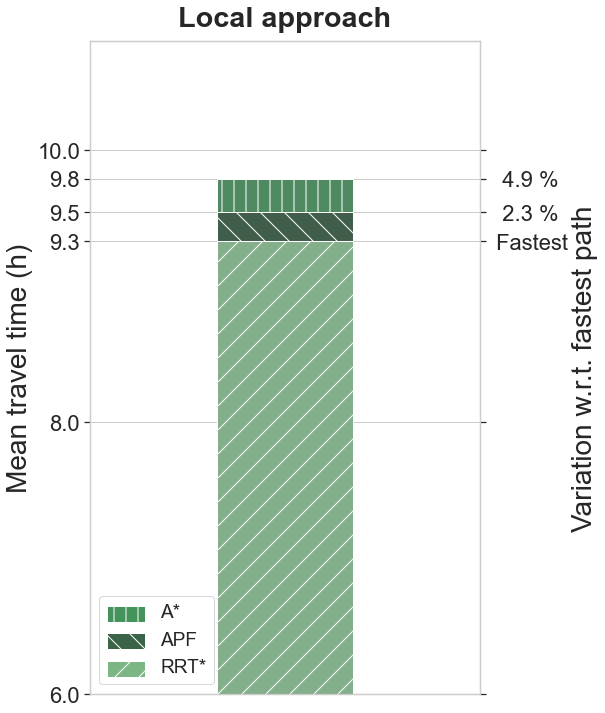

In [102]:
sns.set_context(rc = {'patch.linewidth': 0.8})
sns.set_theme(style="whitegrid",font_scale=1.5)
#green = 7cb685, 44935b, 3b6347, blue = 7da9c7, 4884af, 3d5b70 orange = dd905b, cd6529, 7f4c2e 
#style palette = 5975a4 (blue), cc8963 (orange), 5f9e6e (green)
color_sum = "#3b6347"
color_glo = "#44935b"
color_loc = "#7cb685"

f, ax = plt.subplots(figsize=(7,12))
ax = sns.barplot(x="Algorithm", y="Mean travel time (h)", data=data_sum_astar, ci=None,  color=color_glo, label='A*')
ax = sns.barplot(x="Algorithm",  y="Mean travel time (h)", data=data_sum_apf, ci=None, color=color_sum, label='APF')
ax = sns.barplot(x="Algorithm", y="Mean travel time (h)", data=data_sum_rrt, ci=None,  color=color_loc,  label='RRT*')



bars = ax.patches
pattern=['|','\\', '/'] # ['-', 'x', '+'] #  ##
hatches=np.repeat(pattern,1)
for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


ax2 = ax.twinx() 
ax2 = sns.barplot(x="Algorithm", y="Mean travel time (h)", data=data_sum_astar, ci=None,  color=color_glo, label='A*')
ax2 = sns.barplot(x="Algorithm",  y="Mean travel time (h)", data=data_sum_apf, ci=None, color=color_sum, label='APF')
ax2 = sns.barplot(x="Algorithm", y="Mean travel time (h)", data=data_sum_rrt, ci=None,  color=color_loc,  label='RRT*')


bars = ax2.patches
# pattern=['|','\\','/']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


# add legend
legend_astar = mpatches.Patch(edgecolor ="white", facecolor =color_glo, label='A*', hatch = "|")
legend_apf = mpatches.Patch(edgecolor ="white", facecolor =color_sum, label='APF', hatch="\\")
legend_rrt= mpatches.Patch(edgecolor ="white", facecolor =color_loc, label='RRT*', hatch="/")

leg = plt.legend(handles=[legend_astar, legend_apf, legend_rrt], loc="lower left", fontsize=19)

#for patch in leg.get_patches():
#    patch.set_height(24)
#    patch.set_y(-4)

for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-4)
    
change_width_vertical(ax, 0.35)  
change_width_vertical(ax2, 0.35)  


#Travel time axes 
axtik = ax.get_yticks().tolist()
#axtik.remove(axtik[-1])
# axtik.remove(10.0)

for dataframe_t in [data_sum_apf,data_sum_rrt,data_sum_astar]:
    axtik.append(round(dataframe_t["Mean travel time (h)"][0],3))
    axtik.sort()

# axtik.remove(10.0)
axlabels = []
temp = 0
for i in axtik:
#     print(temp)
    if temp == 5:
        to_ins = Text(i,0,"" + str(round(i,1)))
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
    temp += 1

# axlabels.pop(6)   

ax.set_yticks(axtik)
ax.set_ylabel("Mean travel time (h)", fontsize=28)
ax.set_yticklabels(axlabels,rotation=0, fontsize=22)


ax2tik = ax2.get_yticks().tolist()
#ax2tik.remove(ax2tik[-1])

for dataframe_t in [data_sum_apf,data_sum_rrt,data_sum_astar]:
    ax2tik.append(round(dataframe_t["Mean travel time (h)"][0],3))
    ax2tik.sort()

tocheckvalue = [round(dataframe_t["Mean travel time (h)"][0],3) for dataframe_t in [data_sum_apf,data_sum_rrt,data_sum_astar]]
ax2labels = []


for i in axtik:
    if i in tocheckvalue:
        for a in [data_sum_apf,data_sum_rrt,data_sum_astar]:
            if round(a["Mean travel time (h)"][0],3) != i:
                continue
            else:
                print(number)
                number = a["Variation w.r.t. fastest path (%)"][0]
                if number == 0:
                    count  = 0
                    to_ins = Text(i,0, " "*count + " Fastest" )
                    ax2labels.append(to_ins)
                else:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
                    ax2labels.append(to_ins)

    else:
        to_ins = Text(i,0,"")
        ax2labels.append(to_ins)

# ax2tik.remove(10.0)
ax2.set_ylabel("Variation w.r.t. fastest path", fontsize=28)
ax.set_xlabel(None)
ax2.set_yticks(ax2tik)
ax2.set_yticklabels(ax2labels,rotation=0, fontsize=22)

ax.set_ylim(6, 10.8)
ax2.set_ylim(6, 10.8)
# ax.yaxis.grid(True, which='minor')
# ax2.yaxis.grid(True, which='minor')

plt.title("Local approach", pad = 15, fontdict={'fontsize': plt.rcParams['axes.titlesize']*1.6,
 'fontweight' : "bold"} )

plt.savefig("barlocnew.png", dpi=300, bbox_inches='tight')

plt.show()

In [83]:
axtik

[0.0, 2.0, 4.0, 6.0, 8.0, 9.289, 9.368, 9.652, 10.0, 12.0]

In [4]:
# ax.xaxis.get_majorticklabels()[1]

## Scenari algoritmi

In [266]:
df_rrt = pd.DataFrame(data={'Algorithm': [""], 'Travel time (h)': [np.mean([6.18, 8.99, 6.05])] , 'Computing time (s)': [np.mean([35.281, 39.184, 32.237])], "Variation w.r.t. fastest path (%)": [0]})
df_astar = pd.DataFrame(data={'Algorithm': [""], 'Travel time (h)': [np.mean([6.18, 9.05, 6.41])], 'Computing time (s)': [np.mean([1.559, 1.572 , 1.219 ])], "Variation w.r.t. fastest path (%)": [0]})
df_apf = pd.DataFrame(data={'Algorithm': [""], 'Travel time (h)': [np.mean([7.09, 9.91, 7.76])], 'Computing time (s)': [np.mean([33.617, 38.760, 30.000])], "Variation w.r.t. fastest path (%)": [0]})

min_mean = min([df_astar["Travel time (h)"][0],df_rrt["Travel time (h)"][0],df_apf["Travel time (h)"][0]])
max_mean = max([df_astar["Travel time (h)"][0],df_rrt["Travel time (h)"][0],df_apf["Travel time (h)"][0]])

df_astar["Variation w.r.t. fastest path (%)"]= (((df_astar["Travel time (h)"][0] - min_mean)*100)/min_mean)
df_rrt["Variation w.r.t. fastest path (%)"]= (((df_rrt["Travel time (h)"][0] - min_mean)*100)/min_mean)
df_apf["Variation w.r.t. fastest path (%)"]= (((df_apf["Travel time (h)"][0] - min_mean)*100)/min_mean)

min_mean2 = min([df_astar["Computing time (s)"][0],df_rrt["Computing time (s)"][0],df_apf["Computing time (s)"][0]])
max_mean2 = max([df_astar["Computing time (s)"][0],df_rrt["Computing time (s)"][0],df_apf["Computing time (s)"][0]])

df_astar["Variation w.r.t. fastest algorithm (%)"]= (((df_astar["Computing time (s)"][0] - min_mean2)*100)/min_mean2)
df_rrt["Variation w.r.t. fastest algorithm (%)"]= (((df_rrt["Computing time (s)"][0] - min_mean2)*100)/min_mean2)
df_apf["Variation w.r.t. fastest algorithm (%)"]= (((df_apf["Computing time (s)"][0] - min_mean2)*100)/min_mean2)

print(df_apf)
print(df_rrt)
print(df_astar)

  Algorithm  Travel time (h)  Computing time (s)  \
0                   8.253333           34.125667   

   Variation w.r.t. fastest path (%)  Variation w.r.t. fastest algorithm (%)  
0                          16.682375                             2253.494253  
  Algorithm  Travel time (h)  Computing time (s)  \
0                   7.073333           35.567333   

   Variation w.r.t. fastest path (%)  Variation w.r.t. fastest algorithm (%)  
0                                0.0                              2352.91954  
  Algorithm  Travel time (h)  Computing time (s)  \
0                   7.213333                1.45   

   Variation w.r.t. fastest path (%)  Variation w.r.t. fastest algorithm (%)  
0                           1.979265                                     0.0  


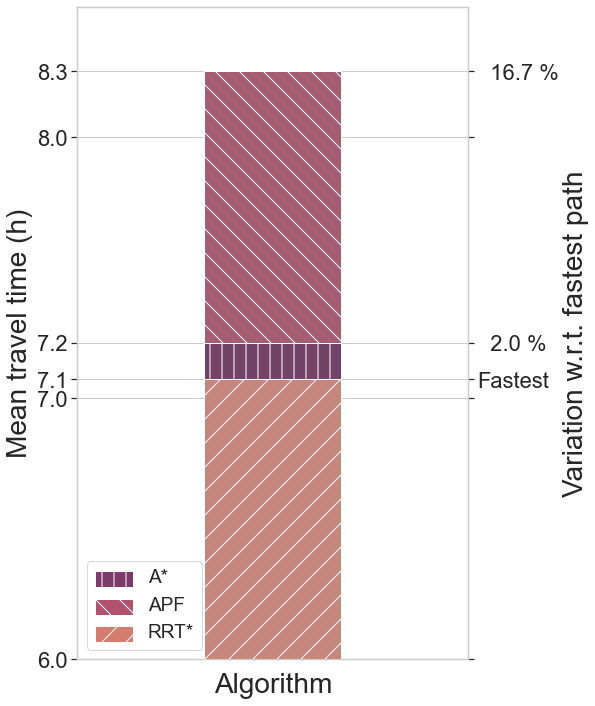

In [622]:
sns.set_context(rc = {'patch.linewidth': 0.8})
sns.set_theme(style="whitegrid",font_scale=1.5)

color_rrt = "#d47d6f"
color_apf = "#b1516e"
color_astar = "#7b3b6b"

f, ax = plt.subplots(figsize=(7,12))
ax = sns.barplot(x="Algorithm",  y="Travel time (h)", data=df_apf, ci=None, color=color_apf, label='APF')
ax = sns.barplot(x="Algorithm", y="Travel time (h)", data=df_astar, ci=None,  color=color_astar, label='A*')
ax = sns.barplot(x="Algorithm", y="Travel time (h)", data=df_rrt, ci=None,  color=color_rrt,  label='RRT*')


bars = ax.patches
pattern=['\\', '|' ,'/']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


ax2 = ax.twinx() 
ax2 = sns.barplot(x="Algorithm",  y="Travel time (h)", data=df_apf, ci=None, color=color_apf, label='APF')
ax2 = sns.barplot(x="Algorithm", y="Travel time (h)", data=df_astar, ci=None,  color=color_astar, label='A*')
ax2 = sns.barplot(x="Algorithm", y="Travel time (h)", data=df_rrt, ci=None,  color=color_rrt,  label='RRT*')

bars = ax2.patches
# pattern=['-','/','\\']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)
# # add legend
legend_astar = mpatches.Patch(edgecolor ="white", facecolor =color_astar, label='A*', hatch = "|")
legend_apf = mpatches.Patch(edgecolor ="white", facecolor =color_apf, label='APF', hatch="\\")
legend_rrt= mpatches.Patch(edgecolor ="white", facecolor =color_rrt, label='RRT*', hatch="/")

leg = plt.legend(handles=[legend_astar, legend_apf, legend_rrt], loc="lower left", fontsize=19)

for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-4)
    
change_width_vertical(ax, 0.35)   
change_width_vertical(ax2, 0.35) 

axtik = ax.get_yticks().tolist()
#axtik.remove(axtik[-1])

for dataframe_t in [df_apf,df_rrt,df_astar]:
    axtik.append(round(dataframe_t["Travel time (h)"][0],3))
    axtik.sort()

axlabels = []
for i in axtik:
    to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
# axtik.remove(10.0)
# axlabels.pop(6)   
ax.set_yticks(axtik)
ax.set_ylabel("Mean travel time (h)", fontsize=28)
ax.set_xlabel("Algorithm", fontsize=28)
ax.set_yticklabels(axlabels,rotation=0, fontsize=22)


ax2tik = ax2.get_yticks().tolist()
#ax2tik.remove(ax2tik[-1])

for dataframe_t in [df_apf,df_rrt,df_astar]:
    ax2tik.append(round(dataframe_t["Travel time (h)"][0],3))
    ax2tik.sort()

tocheckvalue = [round(dataframe_t["Travel time (h)"][0],3) for dataframe_t in [df_apf,df_rrt,df_astar]]
ax2labels = []


for i in axtik:
    if i in tocheckvalue:
        for a in [df_apf,df_rrt,df_astar]:
            if round(a["Travel time (h)"][0],3) != i:
                continue
            else:
                number = a["Variation w.r.t. fastest path (%)"][0]
                if number == 0:
                    count  = 0
                    to_ins = Text(i,0, " "*count + "Fastest" )
                    ax2labels.append(to_ins)
                else:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
                    ax2labels.append(to_ins)

    else:
        to_ins = Text(i,0,"")
        ax2labels.append(to_ins)

# # ax2tik.remove(10.0)
ax2.set_ylabel("Variation w.r.t. fastest path", fontsize=28)
ax2.set_yticks(ax2tik)
ax2.set_yticklabels(ax2labels,rotation=0, fontsize=22)

ax.set_ylim(6, 8.5)
ax2.set_ylim(6, 8.5)

plt.savefig("toyalgtraveltime.png", dpi=300, bbox_inches='tight')
plt.show()

In [147]:
axtik

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 7.073, 7.213, 8.0, 8.253, 9.0]

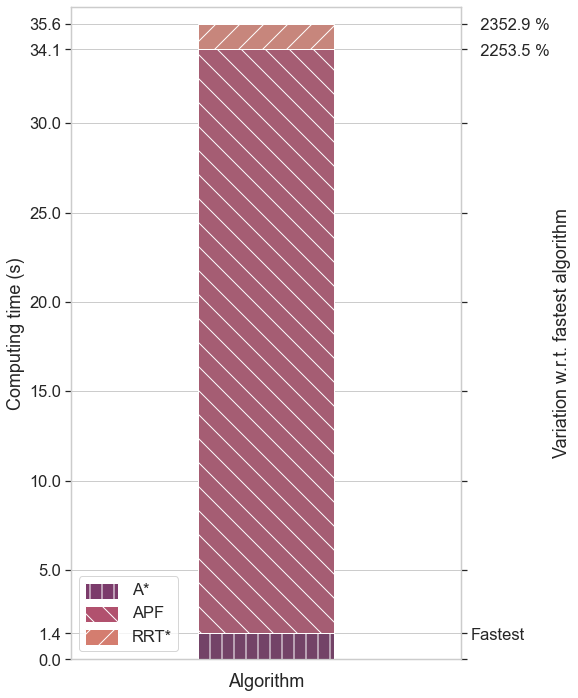

In [268]:
sns.set_context(rc = {'patch.linewidth': 0.8})
sns.set_theme(style="whitegrid",font_scale=1.5)

color_rrt = "#d47d6f"
color_apf = "#b1516e"
color_astar = "#7b3b6b"

f, ax = plt.subplots(figsize=(7,12))
ax = sns.barplot(x="Algorithm", y="Computing time (s)", data=df_rrt, ci=None,  color=color_rrt,  label='RRT*')
ax = sns.barplot(x="Algorithm",  y="Computing time (s)", data=df_apf, ci=None, color=color_apf, label='APF')
ax = sns.barplot(x="Algorithm", y="Computing time (s)", data=df_astar, ci=None,  color=color_astar, label='A*')



bars = ax.patches
pattern=['/','\\','|']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


ax2 = ax.twinx() 
ax2 = sns.barplot(x="Algorithm", y="Computing time (s)", data=df_rrt, ci=None,  color=color_rrt,  label='RRT*')
ax2 = sns.barplot(x="Algorithm",  y="Computing time (s)", data=df_apf, ci=None, color=color_apf, label='APF')
ax2 = sns.barplot(x="Algorithm", y="Computing time (s)", data=df_astar, ci=None,  color=color_astar, label='A*')


bars = ax2.patches
# pattern=['/','\\','|']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)
# # # add legend
legend_astar = mpatches.Patch(edgecolor ="white", facecolor =color_astar, label='A*', hatch = "|")
legend_apf = mpatches.Patch(edgecolor ="white", facecolor =color_apf, label='APF', hatch="\\")
legend_rrt= mpatches.Patch(edgecolor ="white", facecolor =color_rrt, label='RRT*', hatch="/")

leg = plt.legend(handles=[legend_astar, legend_apf, legend_rrt], loc="lower left")

for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-4)
    
change_width_vertical(ax, 0.35)   
change_width_vertical(ax2, 0.35) 

axtik = ax.get_yticks().tolist()
#axtik.remove(axtik[-1])

for dataframe_t in [df_apf,df_rrt,df_astar]:
    axtik.append(round(dataframe_t["Computing time (s)"][0],3))
    axtik.sort()

axlabels = []
for i in axtik:
    to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
# # axtik.remove(10.0)
# # axlabels.pop(6)   
axtik.remove(35.0)
axlabels.pop(9)
ax.set_yticks(axtik)
ax.set_yticklabels(axlabels,rotation=0)


ax2tik = ax2.get_yticks().tolist()
# #ax2tik.remove(ax2tik[-1])

for dataframe_t in [df_apf,df_rrt,df_astar]:
    ax2tik.append(round(dataframe_t["Computing time (s)"][0],3))
    ax2tik.sort()

tocheckvalue = [round(dataframe_t["Computing time (s)"][0],3) for dataframe_t in [df_apf,df_rrt,df_astar]]
ax2labels = []


for i in axtik:
    if i in tocheckvalue:
        for a in [df_apf,df_rrt,df_astar]:
            if round(a["Computing time (s)"][0],3) != i:
                continue
            else:
                number = a["Variation w.r.t. fastest algorithm (%)"][0]
                if number == 0:
                    count  = 0
                    to_ins = Text(i,0, " "*count + "Fastest" )
                    ax2labels.append(to_ins)
                else:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest algorithm (%)"][0],1)) + " %")
                    ax2labels.append(to_ins)

    else:
        to_ins = Text(i,0,"")
        ax2labels.append(to_ins)


ax2tik.remove(35)
# ax2labels.pop(9)
ax2.set_ylabel("Variation w.r.t. fastest algorithm")
ax2.set_yticks(ax2tik)
ax2.set_yticklabels(ax2labels,rotation=0)

ax.set_ylim(0, 36.5)
ax2.set_ylim(0, 36.5)

plt.savefig("toyalgcomptime.png", dpi=300, bbox_inches='tight')
plt.show()

In [290]:
dictionary = {'Algorithm': ['RRT*'], 
              'Planning type':  ['Sum', 'Global', 'Local', 'Improved method'], 
              'Day': ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10','Day11', 'Day12'], 
              'Survey': [1,2,3,4]}
df2 = expand_grid(dictionary)
df2

,Algorithm,Planning type,Day,Survey
0,RRT*,Sum,Day1,1
1,RRT*,Sum,Day1,2
2,RRT*,Sum,Day1,3
3,RRT*,Sum,Day1,4
4,RRT*,Sum,Day2,1
...,...,...,...,...
187,RRT*,Improved method,Day11,4
188,RRT*,Improved method,Day12,1
189,RRT*,Improved method,Day12,2
190,RRT*,Improved method,Day12,3


In [206]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [207]:
dictionary = {'Algorithm': ['RRT*'], 
              'Planning type':  ['Sum', 'Global', 'Local', 'Improved method'], 
              'Day': ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10','Day11', 'Day12'], 
              'Survey': [1,2,3,4]}

df2 = expand_grid(dictionary)

t_travel=[None, None, None, None, 10.95, 9.01, 10.95, 9.01, 11.01, 8.98, 11.01, 8.98, 10.76, 8.83, 10.76, 8.83, None, None, None, None,
          11.39, 9.22, 11.39, 9.22, None, None, None, None, None, None, None, None, None, None, None, None, 12.19, 9.16, 12.19, 9.16,
          10.71, 8.94, 10.71, 8.94, 10.26, 8.53, 10.26, 8.53, #sum RRT
          9.93, 8.76, 11.42, 10.20, 9.13, 8.59, None, None, 10.10, 8.78, 11.11, 9.44, None, None, None, None, 10.61, None, None, 8.52, 
          None, 8.69, None, 8.59, None, None, None, None, None, None, None, None, None, None, None, None, None, 9.20, None, 8.90,
          10.17, 8.70, 9.55, 8.48, 9.64, 8.46, 9.10, 8.77, #global RRT
          9.49, 8.51, 10.42, 9.86, 9.07, 8.56, 9.45, 8.65, 10.08, 8.94, 10.08, 8.45, 10.25, 8.61, 9.97, 8.63, 9.99, 8.47, 10.04, 8.46,
          10.48, 8.64, 11.02, 8.58, 10.94, 8.99, None, None, 9.77, 8.69, None, None, 9.20, 9.44, None, None, 9.52, 8.75, 11.28, 8.87,
          9.93, 8.66, 9.00, 8.25, 9.82, 8.46, 9.13, 8.47, #local RRT
          9.88, 8.56, 10.44, 9.88, 9.12, 8.47, 9.31, 8.49, 10.20, 8.83, 10.09, 8.45, 10.42, 8.72, 10.72, 8.53, 10.20, 8.58, None, 8.48,
          10.15, 8.66, 11.19, 8.78, 11.00, 9.04, None, None, 9.78, 8.76, None, None, 9.51, 9.83, None, None, 9.51, 8.79, 10.77, 8.56,
          9.88, 8.79, 8.91, 8.33, 9.68, 8.49, 9.41, 8.46] # improved method

t_exec = [None, None, None, None, 5.125, 3.984, 5.125, 3.984, 7.037, 3.922, 7.037, 3.922, 9.617, 2.807, 9.617, 2.807, None, None, None, None,
          9.110, 8.530, 9.110, 8.530, None, None, None, None, None, None, None, None, None, None, None, None, 8.564, 4.868, 8.564, 4.868,
          2.579, 2.170, 2.579, 2.170, 7.264, 3.651, 7.264, 3.651,
         35.361, 28.301, 34.813, 29.758, 60.924, 40.481, None, None, 51.197, 31.26, 47.106, 39.223, None, None, None, None, 59.267, None, None, 26.785,
          None, 24.212, None, 24.101, None, None, None, None, None, None, None, None, None, None, None, None, None, 34.369, None, 21.298,
          20.350, 66.402, 41.975, 40.509, 93.385, 17.802, 20.928, 25.891,
         11.053, 10.719, 4.789, 4.317, 12.595, 9.615, 11.377, 10.152, 6.240, 4.550, 4.623, 5.447, 8.346, 6.085, 7.240, 11.968, 12.013, 8.093, 6.663, 6.120,
          6.675, 5.805, 10.737, 5.483, 9.918, 13.051, None, None, 10.483, 6.476, None, None, 8.186, 11.167, None, None, 12.979, 8.913, 6.896, 7.978,
          3.285, 2.424, 2.742, 3.471, 6.704, 6.045, 3.709, 4.047,
         94.917, 84.639, 155.573, 95.642, 73.043, 74.349, 190.166, 193.995, 96.444, 87.418, 87.209, 182.016, 117.157, 87.165, 166.970, 89.894, 107.686, 81.896, None, 72.751,
         106.792, 79.588, 151.489, 193.621, 118.273, 142.700, None, None, 74.561, 79.866, None, None, 114.337, 65.743, None, None, 92.934, 79.065, 188.916, 214.517,
         83.794, 81.206, 62.912, 57.084, 82.465, 114.583, 75.372, 52.286]


success_ratio = np.zeros_like(t_travel)
planning_ratio = np.zeros_like(t_travel)

# for i in range(len(t_travel)): # 1 found path, 0 failed
#     if t_travel[i]:
#         success_ratio[i] = 100
#         planning_ratio[i] = 100
#     else:
#         if df['Planning type'][i] == 'Global':
#             success_ratio[i] = 0
#             planning_ratio[i] = 100
            
#         if df['Planning type'][i] == 'Summing':
#             success_ratio[i] = 100
#             planning_ratio[i] = 0           
        

planning_ratio = np.zeros_like(t_travel)
for i in range(len(t_travel)): # 1 found path, 0 failed
    if t_travel[i]:
        planning_ratio[i] = 100
    else:
        planning_ratio[i] = 0

In [208]:
df2['Efficiency (%)'] = planning_ratio
df2['Travel time (h)'] = t_travel
df2['Computing time (s)'] = t_exec 
df2

,Algorithm,Planning type,Day,Survey,Efficiency (%),Travel time (h),Computing time (s)
0,RRT*,Sum,Day1,1,0,NaN,NaN
1,RRT*,Sum,Day1,2,0,NaN,NaN
2,RRT*,Sum,Day1,3,0,NaN,NaN
3,RRT*,Sum,Day1,4,0,NaN,NaN
4,RRT*,Sum,Day2,1,100,10.95,5.125
...,...,...,...,...,...,...,...
187,RRT*,Improved method,Day11,4,100,8.33,57.084
188,RRT*,Improved method,Day12,1,100,9.68,82.465
189,RRT*,Improved method,Day12,2,100,8.49,114.583
190,RRT*,Improved method,Day12,3,100,9.41,75.372


In [209]:
# devo considerare solo le simulazioni in cui tutti i metodi non sono None
# ovvero Day 3 all survey, 11 survey2, 12 survey2,
df_rrt = df2.loc[df2['Algorithm']== 'RRT*']
lista = []

for i, val in df_rrt.iterrows():
    temp_dict = {}
    if (np.isnan(val["Travel time (h)"])) == True:
        temp_dict["Day"] = val["Day"]
        temp_dict["Sur"] = val["Survey"]
        lista.append(temp_dict)
        
todrop = []
for temp in lista: 
    day  = temp["Day"]
    surv = temp["Sur"]
    for index, value in df_rrt.iterrows():
        if value["Day"]==day and value["Survey"] == surv:
            todrop.append(index)
            
df_rrt_mod = df_rrt
df_rrt_mod = df_rrt_mod.drop(todrop)

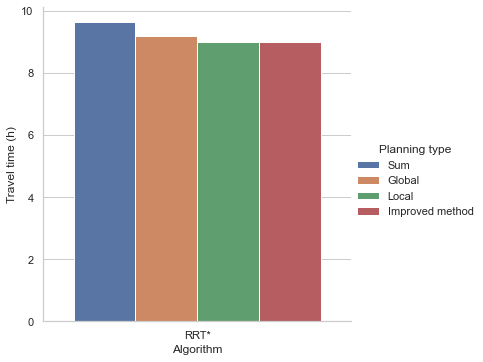

In [211]:
len(df_rrt_mod)

sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Travel time (h)", hue="Planning type", kind="bar", data=df_rrt_mod, ci=None)
# plt.savefig("tcomp_new.png", dpi=300,bbox_inches='tight')
plt.show()

In [295]:
safetytot1

[100, 100, 72.22222222222223]

In [298]:
efficiency1.append(np.mean(df2.loc[df2['Planning type'] == 'Improved method']['Efficiency (%)']))

# safetytot1.append(100)

# stdeff = [np.std(df.loc[df['Planning type'] == 'Sum']['Path planning success ratio (%)']),
#           np.std(df.loc[df['Planning type'] == 'Global']['Path planning success ratio (%)']),
#           0,
#           0] 

# stdsaf = [0,
#           np.std(df.loc[df['Planning type'] == 'Global']['Path planning success ratio (%)']),
#           np.std(safetyimpr),
#           0] 

In [299]:
efficiency1

[56.94444444444444, 52.77777777777778, 87.5, 85.41666666666667]

In [300]:
dfeff_saf = pd.DataFrame(data={'Approach': ["Sum", "Global", "Local", "Improved method"], 'Efficiency (%)':efficiency1, 'Safety (%)':safetytot1})
dfeff_saf

,Approach,Efficiency (%),Safety (%)
0,Sum,56.944444,100.000000
1,Global,52.777778,100.000000
2,Local,87.500000,72.222222
3,Improved method,85.416667,100.000000


(0.0, 110.0)

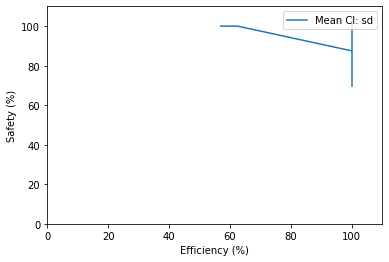

In [10]:
ax = sns.lineplot(data=dfeff_saf, x="Efficiency (%)", y="Safety (%)", ci='sd', err_style='bars', label='Mean CI: sd')
ax.set_ylim(0, 110)
ax.set_xlim(0, 110)
# flights.groupby('year').passengers.agg([min, max]).plot(ax=ax2)
# ax2.set(title='Mean Min & Max Passengers per Year')

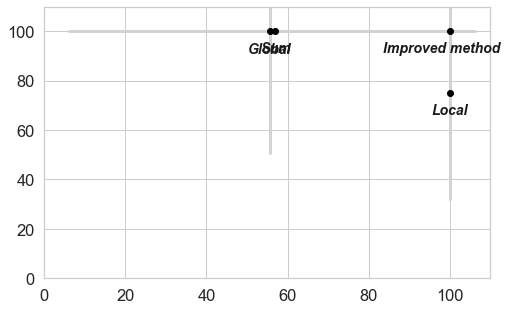

In [32]:
# plt.errorbar(efficiency, safetytot, xerr=stdeff, yerr= stdsaf, fmt='.k');
# plt.ylim(0, 110)
# plt.xlim(0, 110)



plt.errorbar(efficiency, safetytot, xerr=stdeff, yerr= stdsaf, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
plt.text(efficiency[0], safetytot[0]-4, 'Sum',fontsize=14, fontweight='bold', fontstyle= 'italic',
                    ha='center',va='top',color='k')
plt.text(efficiency[1], safetytot[1]-4.3, 'Global',fontsize=14, fontweight='bold', fontstyle= 'italic',
                    ha='center',va='top',color='k')
plt.text(efficiency[2], safetytot[2]-4, 'Local',fontsize=14, fontweight='bold', fontstyle= 'italic',
                    ha='center',va='top',color='k')
plt.text(efficiency[3]-2, safetytot[3]-4, 'Improved method',fontsize=14, fontweight='bold', fontstyle= 'italic',
                    ha='center',va='top',color='k')
plt.ylim(0, 110)
plt.xlim(0, 110)

# plt.savefig("provaerror.png", dpi=300,bbox_inches='tight')
plt.show()

In [219]:
dfeff_saf['Efficiency (%)'][0]

56.94444444444444

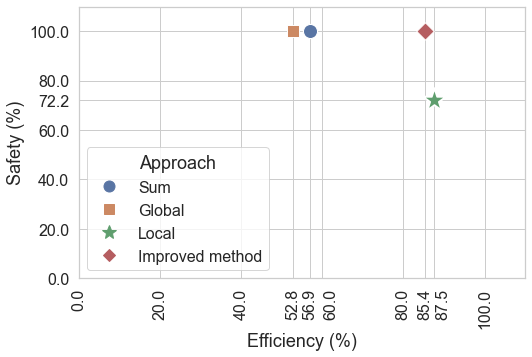

In [309]:
import matplotlib.lines as mlines
import matplotlib as mpl
import types
sns.set(style="whitegrid", rc={'figure.figsize':(8,5)}, font_scale=1.5)

ax = sns.scatterplot(data=dfeff_saf.loc[dfeff_saf['Approach'] == 'Sum'], x="Efficiency (%)", y="Safety (%)", hue="Approach",s=200, marker='o', palette=['#5975a4'], label='Sum')
ax = sns.scatterplot(data=dfeff_saf.loc[dfeff_saf['Approach'] == 'Global'], x="Efficiency (%)", y="Safety (%)", hue="Approach", s=150, marker='s', palette=['#cc8963'], label='Global')
ax = sns.scatterplot(data=dfeff_saf.loc[dfeff_saf['Approach'] == 'Local'], x="Efficiency (%)", y="Safety (%)", hue="Approach",s=600, marker='*', palette=['#5f9e6e'], label='Local')
ax = sns.scatterplot(data=dfeff_saf.loc[dfeff_saf['Approach'] == 'Improved method'], x="Efficiency (%)", y="Safety (%)", hue="Approach",s=150, marker='D', palette=['#b55d60'], label='Improved method')
# sns.lineplot(data=dfeff_saf,  x="Efficiency (%)", y="Safety (%)", hue="Approach", marker='.')
# plt.text(efficiency[0]-2, safetytot[0]-4, 'Sum',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# plt.text(efficiency[1]+3, safetytot[1]-4, 'Global',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# plt.text(efficiency[2], safetytot[2]-4, 'Local',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# plt.text(efficiency[3]-5, safetytot[3]-4, 'Improved method',fontsize=14, fontweight='bold', fontstyle= 'italic',
#                     ha='center',va='top',color='k')
# ax.legend_.remove()



sum1 = mlines.Line2D([], [], color='#5975a4', marker='o', linestyle='None',
                          markersize=11, label='Sum')
global1 = mlines.Line2D([], [], color='#cc8963', marker='s', linestyle='None',
                          markersize=10, label='Global')
loc1 = mlines.Line2D([], [], color='#5f9e6e', marker='*', linestyle='None',
                          markersize=15, label='Local')
impr1 = mlines.Line2D([], [], color='#b55d60', marker='D', linestyle='None',
                          markersize=9, label='Improved method')

plt.legend(handles=[sum1, global1, loc1, impr1],title='Approach', prop={"size":16}, loc="lower left")
# ax.legend(prop={"size":18}, loc="lower left")
# ax.add_legend()
ax.set_ylim(0, 110)
ax.set_xlim(0, 110)
axtik = ax.get_xticks().tolist()
axtik.append(dfeff_saf['Efficiency (%)'][0])
axtik.append(dfeff_saf['Efficiency (%)'][1])
axtik.append(dfeff_saf['Efficiency (%)'][3])
axtik.append(dfeff_saf['Efficiency (%)'][2])
axtik.sort()
# axtik.remove(60.0)
axlabels = []
temp = 0
for i in axtik:
#     print(temp)
    if temp == 5:
        to_ins = Text(i,0,'\n' + str(round(i,1)))
    elif temp == 8:
        to_ins = Text(i,0,'\n' + str(round(i,1)))
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
    temp += 1
ax.set_xticks(axtik)
ax.set_xticklabels(axlabels,rotation='vertical', fontsize=16)

axtik2 = ax.get_yticks().tolist()
axtik2.append(dfeff_saf['Safety (%)'][2])
axtik2.sort()
# ax.set_yticks(axtik2)
# plt.yticks(fontsize=16)
axlabels2 = []
temp = 0
for i in axtik2:
#     print(temp)
    if temp == 5:
        to_ins = Text(i,0,str(round(i,1)))
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels2.append(to_ins)
    temp += 1
ax.set_yticks(axtik2)
ax.set_yticklabels(axlabels2, fontsize=16)

ax.set_ylim(0, 110)
ax.set_xlim(0, 110)
# axtik.remove(60.0)
plt.savefig("safety_effimpr", dpi=300, bbox_inches='tight')
plt.show()

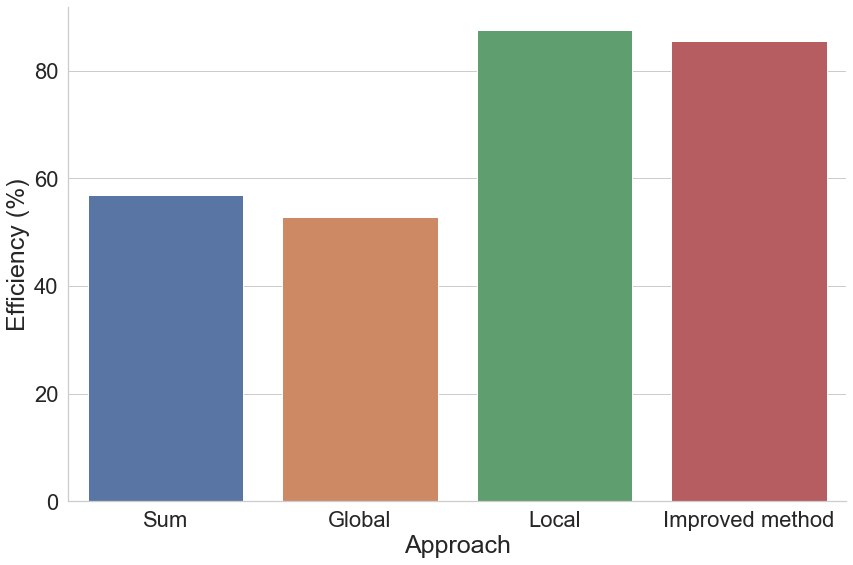

In [259]:
sns.set(style="whitegrid", font_scale=2)
ax = sns.catplot(x="Approach", y="Efficiency (%)", kind="bar", data=dfeff_saf, ci=None, height=8, aspect=1.5)#, palette=sns.color_palette(['#5975a4', '#cc8963', "#5f9e6e", 'gold']))
# ax.axes[0][0].set_xlabel("Algorithm", fontsize=18)
ax.axes[0][0].set_ylabel("Efficiency (%)", fontsize=25)
# plt.title("RRT*", pad = 1, fontweight= "bold")
ax.axes[0][0].set_xlabel("Approach", fontsize=25)
plt.savefig("efficiencyimpr.png", dpi=300, bbox_inches='tight')
plt.show()

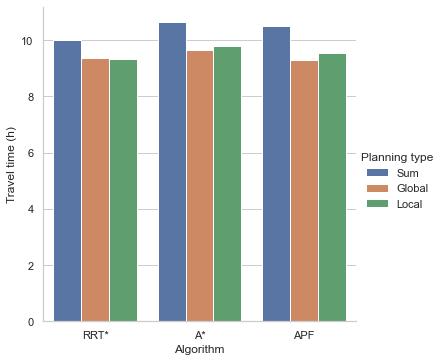

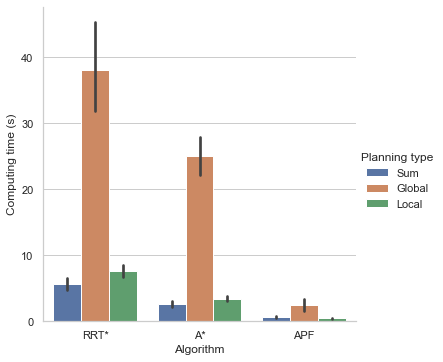

In [260]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Travel time (h)", hue="Planning type", kind="bar", data=df, ci=None)
# plt.savefig("tcomp_new.png", dpi=300,bbox_inches='tight')
plt.show()
sns.catplot(x="Algorithm", y="Computing time (s)", hue="Planning type", kind="bar", data=df)
# plt.savefig("texec_new.png", dpi=300,bbox_inches='tight')
plt.show()

In [213]:
data_summing = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Sum']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_global = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Global']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_local = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Local']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})
data_improved = pd.DataFrame(data={'Planning type': [""], 'Mean travel time (h)':[np.nanmean(df_rrt_mod.loc[df_rrt_mod['Planning type'] == 'Improved method']["Travel time (h)"])], "Variation w.r.t. fastest path (%)": [0]})


min_mean = min([data_summing["Mean travel time (h)"][0],data_global["Mean travel time (h)"][0],data_local["Mean travel time (h)"][0], data_improved["Mean travel time (h)"][0]])
max_mean = max([data_summing["Mean travel time (h)"][0],data_global["Mean travel time (h)"][0],data_local["Mean travel time (h)"][0], data_improved["Mean travel time (h)"][0]])

data_summing["Variation w.r.t. fastest path (%)"]= (((data_summing["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_global["Variation w.r.t. fastest path (%)"]= (((data_global["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_local["Variation w.r.t. fastest path (%)"]= (((data_local["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value
data_improved["Variation w.r.t. fastest path (%)"]= (((data_improved["Mean travel time (h)"][0] - min_mean)*100)/min_mean) + adding_value

print(data_summing)
print(data_global)
print(data_local)
print(data_improved)

  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.643333                           7.320391
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            9.188889                           2.262891
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            8.985556                                0.0
  Planning type  Mean travel time (h)  Variation w.r.t. fastest path (%)
0                            8.994444                           0.098924


In [66]:
ax.get_yaxis().minorTicks#[2]#.label1.set_horizontalalignment('left')

0.0
0.09892419933225735
2.2628910597254834
7.320390750587381


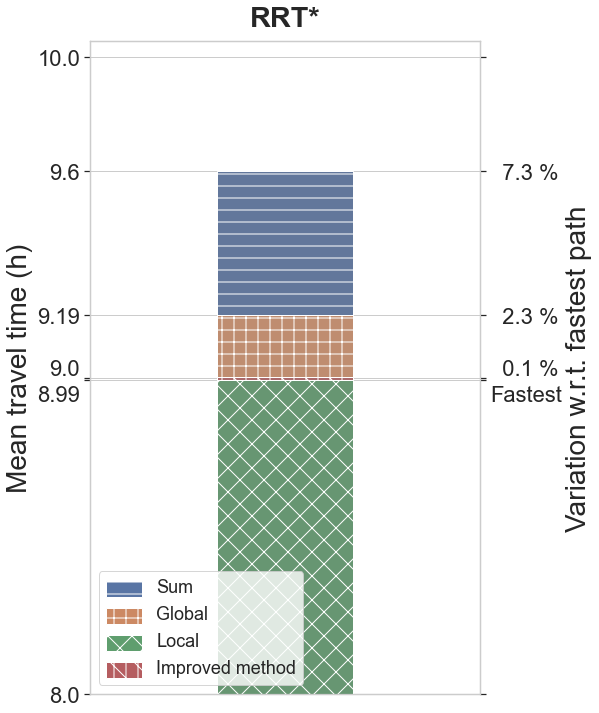

In [230]:
sns.set_context(rc = {'patch.linewidth': 0.8})
sns.set_theme(style="whitegrid",font_scale=1.5)
#green = 7cb685, 44935b, 3b6347, blue = 7da9c7, 4884af, 3d5b70 orange = dd905b, cd6529, 7f4c2e 
#style palette = 5975a4 (blue), cc8963 (orange), 5f9e6e (green)
color_sum = "#5975a4"
color_glo = "#cc8963"
color_loc = "#5f9e6e"
color_impr = "#b55d60"
f, ax = plt.subplots(figsize=(7,12))
ax = sns.barplot(x="Planning type",  y="Mean travel time (h)", data=data_summing, ci=None, color=color_sum, label='Sum')
ax = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_global, ci=None,  color=color_glo, label='Global')
ax = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_improved, ci=None,  color=color_impr, label='Improved method')
ax = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_local, ci=None,  color=color_loc,  label='Local')
bars = ax.patches
pattern=['-', '+', '\|', 'x'] # ['|','/','\\'] ##
hatches=np.repeat(pattern,1)
for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


ax2 = ax.twinx() 
ax2 = sns.barplot(x="Planning type",  y="Mean travel time (h)", data=data_summing, ci=None, color=color_sum, label='Sum')
ax2 = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_global, ci=None,  color=color_glo, label='Global')
ax2 = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_improved, ci=None,  color=color_impr, label='Improved method')
ax2 = sns.barplot(x="Planning type", y="Mean travel time (h)", data=data_local, ci=None,  color=color_loc,  label='Local')


bars = ax2.patches
# pattern=['|','\\','/']
hatches=np.repeat(pattern,1)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)


# add legend
legend_astar = mpatches.Patch(edgecolor ="white", facecolor =color_sum, label='Sum', hatch = "-")
legend_apf = mpatches.Patch(edgecolor ="white", facecolor =color_glo, label='Global', hatch="+")
legend_rrt= mpatches.Patch(edgecolor ="white", facecolor =color_loc, label='Local', hatch="x")
legend_impr= mpatches.Patch(edgecolor ="white", facecolor =color_impr, label='Improved method', hatch="\|")

leg = plt.legend(handles=[legend_astar, legend_apf, legend_rrt, legend_impr], loc="lower left", fontsize=18)

#for patch in leg.get_patches():
#    patch.set_height(24)
#    patch.set_y(-4)

for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-4)
    
change_width_vertical(ax, 0.35)  
change_width_vertical(ax2, 0.35)  


#Travel time axes 
axtik = ax.get_yticks().tolist()
#axtik.remove(axtik[-1])

for dataframe_t in [data_summing,data_global,data_local,data_improved]:
    axtik.append(round(dataframe_t["Mean travel time (h)"][0],3))
    axtik.sort()

# axtik.remove(10.0)
axlabels = []
temp = 0
for i in axtik:
#     print(temp)
    if temp == 5:
        to_ins = Text(i,0,"\n" + str(round(i,2)))
    elif temp == 6:
        to_ins = Text(i,0,str(round(i,1))+ "\n")
    elif temp == 7:
        to_ins = Text(i,0,str(round(i,2)) + "")
    else:
        to_ins = Text(i,0,str(round(i,1)))
    axlabels.append(to_ins)
    temp += 1

# axlabels.pop(6)   

ax.set_yticks(axtik)
ax.set_ylabel("Mean travel time (h)", fontsize=28)
ax.set_yticklabels(axlabels,rotation=0, fontsize=22)


ax2tik = ax2.get_yticks().tolist()
#ax2tik.remove(ax2tik[-1])

for dataframe_t in [data_summing,data_global,data_local, data_improved]:
    ax2tik.append(round(dataframe_t["Mean travel time (h)"][0],3))
    ax2tik.sort()

tocheckvalue = [round(dataframe_t["Mean travel time (h)"][0],3) for dataframe_t in [data_summing,data_global,data_local, data_improved]]
ax2labels = []


for i in axtik:
    if i in tocheckvalue:
        for a in [data_summing,data_global,data_local, data_improved]:
            if round(a["Mean travel time (h)"][0],3) != i:
                continue
            else:
                number = a["Variation w.r.t. fastest path (%)"][0]
                print(number)
                if number == 0:
                    count  = 0
                    to_ins = Text(i,0, " "*count + " \nFastest" )
                    ax2labels.append(to_ins)
                elif number == 0.09892419933225735:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1))+ " %\n")
                    ax2labels.append(to_ins)
                elif number == 0.29022815555431625:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
                    ax2labels.append(to_ins)    
                else:
                    count  = 2
                    to_ins = Text(i,0," "*count + str(round(a["Variation w.r.t. fastest path (%)"][0],1)) + " %")
                    ax2labels.append(to_ins)

    else:
        to_ins = Text(i,0,"")
        ax2labels.append(to_ins)

# ax2tik.remove(10.0)
ax2.set_ylabel("Variation w.r.t. fastest path", fontsize=28)
ax.set_xlabel(None)
ax2.set_yticks(ax2tik)
ax2.set_yticklabels(ax2labels,rotation=0, fontsize=22)

ax.set_ylim(8, 10.05)
ax2.set_ylim(8, 10.05)
# ax.yaxis.grid(True, which='minor')
# ax2.yaxis.grid(True, which='minor')

plt.title("RRT*", pad = 15, fontdict={'fontsize': plt.rcParams['axes.titlesize']*1.6,
 'fontweight' : "bold"} )

plt.savefig("barimprovednew2.png", dpi=300, bbox_inches='tight')

plt.show()

In [219]:
axtik

[0.0, 2.0, 4.0, 6.0, 8.0, 8.986, 8.994, 9.189, 9.643, 12.0]

In [263]:
# sns.set_theme(style="whitegrid")
# sns.set_context(rc = {'patch.linewidth': 0.0})

# ax = sns.catplot(x="Planning type", y="Path planning success ratio (%)", kind="bar", data=rrt_df, ci=None, palette=["blue", 'orange', 'green', 'violet']) # flare = d47d6f, b1516e, 7b3b6b, orange = dd905b, cd6529, 7f4c2e
# # plt.savefig("bleah.png", dpi=300, bbox_inches='tight')                                                    # green = 7cb685, 44935b, 3b6347, blue = 7da9c7, 4884af, 3d5b70
# plt.show()